<a href="https://colab.research.google.com/github/louise-queiroz/web-analytics-case/blob/main/dataPerguntas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'database.csv'

data= pd.read_csv(path, index_col=0)
print(data.head())

            id_marca  vendas  valor_do_veiculo nome_veiculo       marca
data                                                                   
2022-01-01         1      40             29000         Mobi        Fiat
2022-01-01         1       2             49000         argo        Fiat
2022-01-01         1       3             19000          Uno        Fiat
2022-01-01         2      35             35000           Up  Volkswagen
2022-01-01         3      42             32000      Picanto         Kia


A marca com o maior volume de vendas é: Fiat


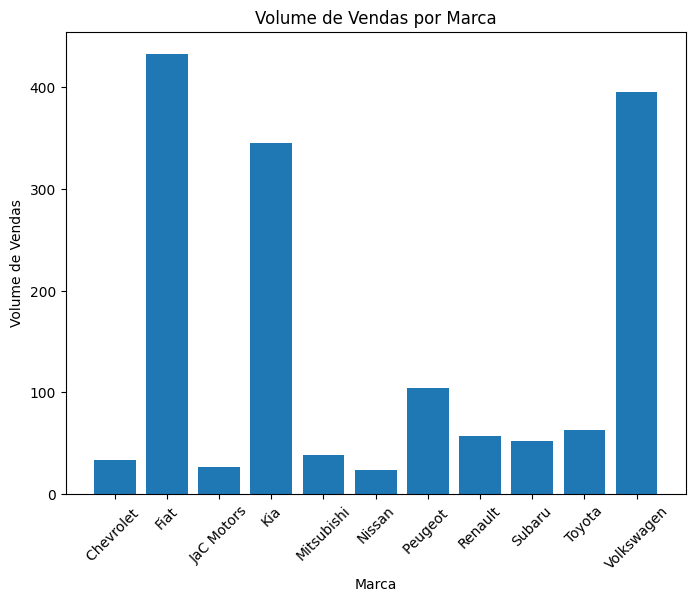

In [ ]:
# Qual marca teve o maior volume de vendas?
biggestVol = data.groupby('marca')['vendas'].sum().idxmax()

print(f"A marca com o maior volume de vendas é: {biggestVol}")

plt.figure(figsize=(8, 6))
plt.bar(data.groupby('marca')['vendas'].sum().index, data.groupby('marca')['vendas'].sum())
plt.title('Volume de Vendas por Marca')
plt.xlabel('Marca')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=45)
plt.show()


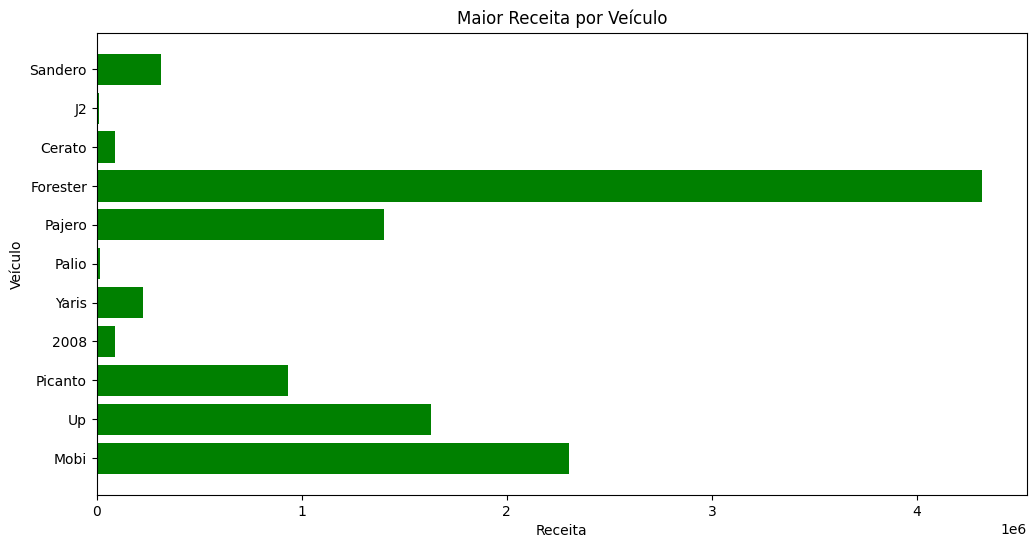

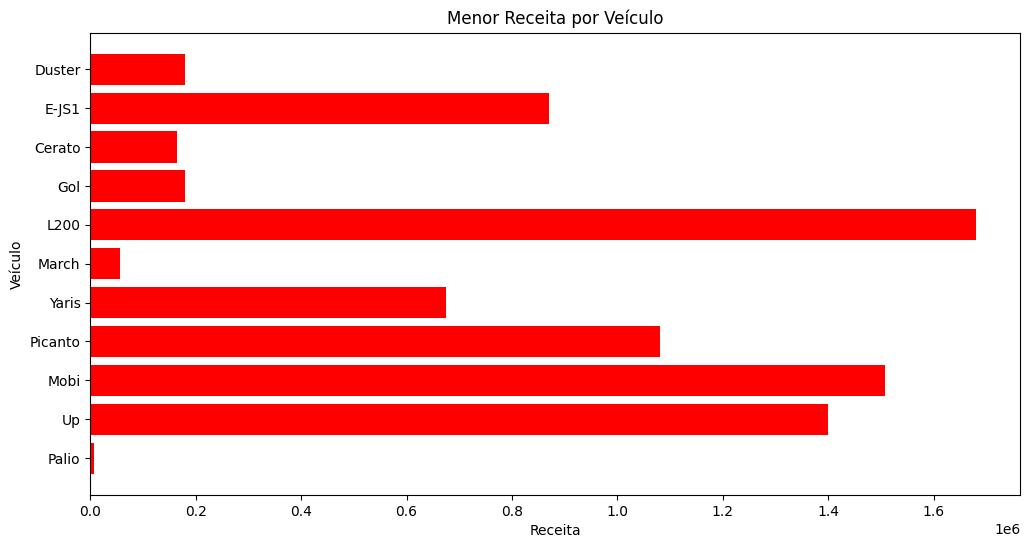

In [ ]:
#Qual veículo gerou a maior e menor receita?

data['receita'] = data['vendas'] * data['valor_do_veiculo']

biggestReceipt = data.loc[data['receita'].idxmax()]

lowestReceipt = data.loc[data['receita'].idxmin()]


plt.figure(figsize=(12, 6))
plt.barh(biggestReceipt['nome_veiculo'], biggestReceipt['receita'], color='green')
plt.title('Maior Receita por Veículo')
plt.xlabel('Receita')
plt.ylabel('Veículo')
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(lowestReceipt['nome_veiculo'], lowestReceipt['receita'], color='red')
plt.title('Menor Receita por Veículo')
plt.xlabel('Receita')
plt.ylabel('Veículo')
plt.show()


A média de vendas do ano por marca é:          marca  data     vendas
0   Chevrolet   2022   3.666667
1         Fiat  2022  19.681818
2   JaC Motors  2022   2.166667
3          Kia  2022  23.000000
4   Mitsubishi  2022   3.800000
5       Nissan  2022   3.285714
6     Peugeot   2022  11.555556
7      Renault  2022   4.750000
8       Subaru  2022   7.428571
9       Toyota  2022   7.875000
10  Volkswagen  2022  18.809524


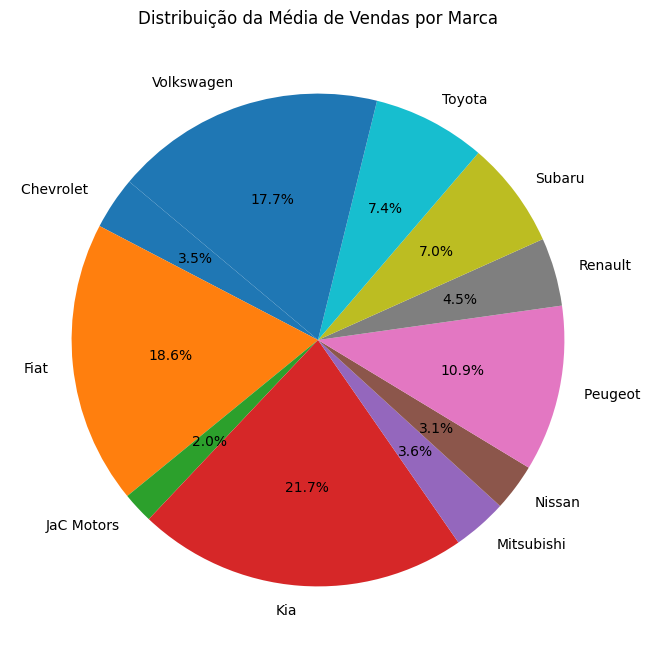

In [ ]:
#Qual a média de vendas do ano por marca?
data.index = pd.to_datetime(data.index)

mediaSales = data.groupby(['marca', data.index.year])['vendas'].mean()
mediaSales = mediaSales.reset_index()
total_media_por_marca = mediaSales.groupby('marca')['vendas'].sum().reset_index()


print(f"A média de vendas do ano por marca é: {mediaSales}")

plt.figure(figsize=(10, 8))
plt.pie(total_media_por_marca['vendas'], labels=total_media_por_marca['marca'], autopct='%1.1f%%', startangle=140)
plt.title('Distribuição da Média de Vendas por Marca')
plt.show()

As marcas que geraram uma receita maior com número menor de vendas foram:marca
Chevrolet      40000.0
JaC Motors    270000.0
Mitsubishi     75000.0
Nissan         22000.0
Peugeot        19000.0
Renault        30000.0
Subaru        600000.0
Toyota        120000.0
dtype: float64


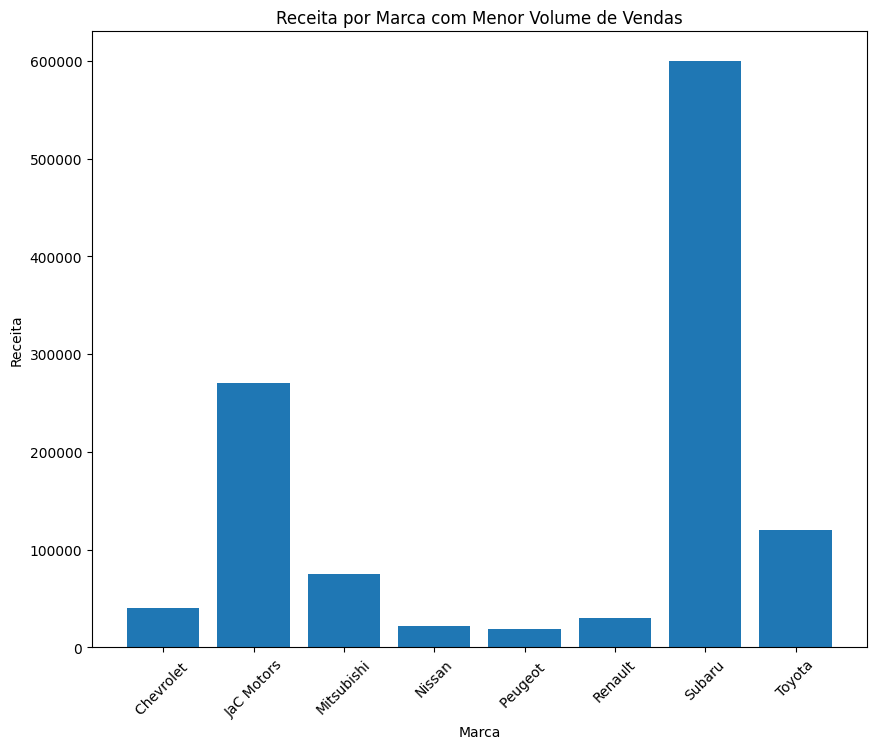

In [ ]:
#Quais marcas geraram uma receita maior com número menor de vendas?
data['valor_do_veiculo'] = pd.to_numeric(data['valor_do_veiculo'], errors='coerce')
data['receita'] = data['vendas'] * data['valor_do_veiculo']

brandBiggestReceipt = data.groupby('marca').apply(lambda x: x.loc[x['vendas'].idxmin()]['receita'])
brandBiggestReceipt = pd.to_numeric(brandBiggestReceipt, errors='coerce').dropna()


print(f"As marcas que geraram uma receita maior com número menor de vendas foram:{brandBiggestReceipt}")
plt.figure(figsize=(10, 8))
plt.bar(brandBiggestReceipt.index, brandBiggestReceipt)
plt.title('Receita por Marca com Menor Volume de Vendas')
plt.xlabel('Marca')
plt.ylabel('Receita')
plt.xticks(rotation=45)
plt.show()

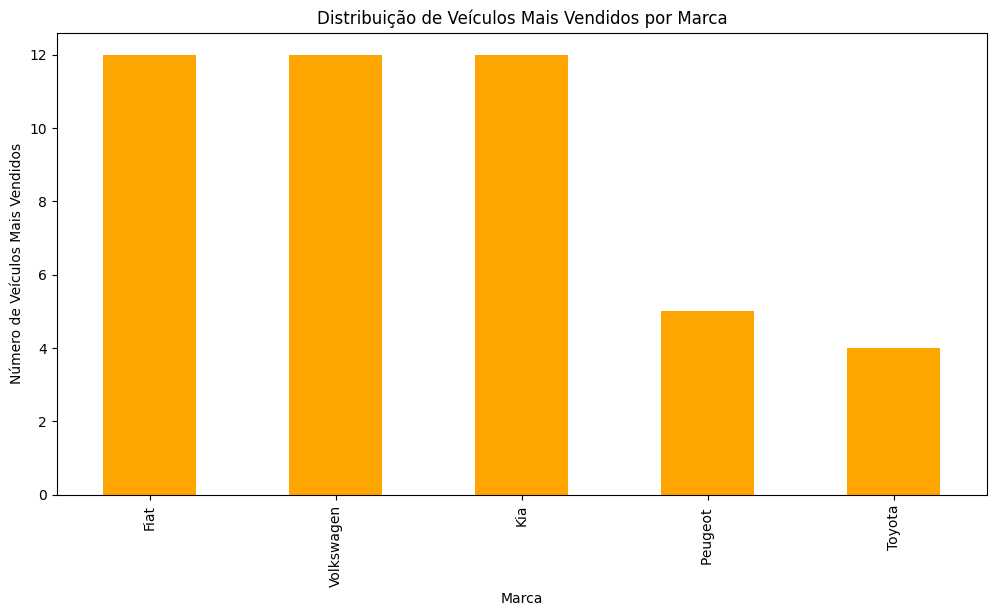

In [ ]:
#Existe alguma relação entre os veículos mais vendidos?

mostSale = data.groupby('nome_veiculo')['vendas'].sum().sort_values(ascending=False).head(5)
mostSaleData = data[data['nome_veiculo'].isin(mostSale.index)]
brandCount = mostSaleData['marca'].value_counts()

#print(f"A relação entre veículos mais vendidos: {mostSale}")

plt.figure(figsize=(12, 6))
brandCount.plot(kind='bar', color='orange')
plt.title('Distribuição de Veículos Mais Vendidos por Marca')
plt.xlabel('Marca')
plt.ylabel('Número de Veículos Mais Vendidos')
plt.show()